# NiBabel
---

**NIfTI file format**을 사용하기 위한 Python package **NiBabel**!


This Python package provides **read +/- write access to some common medical and neuroimaging file formats**, including: ANALYZE (plain, SPM99, SPM2 and later), GIFTI, NIfTI1, NIfTI2, MINC1, MINC2, MGH and ECAT as well as Philips PAR/REC. We can read and write FreeSurfer geometry, annotation and morphometry files. There is some very limited support for DICOM. NiBabel is the successor of PyNIfTI.
        
        
**The various image format classes** give full or selective access to **header (meta) information** and access to **the image data** is made available **via NumPy arrays**.


NiBabel offers both **high-level format-independent access to neuroimages**, as well as an **API with various levels of format-specific access** to all available information in a particular file format.


* **Reference**
   * [NIfTI-1](https://brainder.org/2012/09/23/the-nifti-file-format/)
   * [NIfTI-2](https://brainder.org/2015/04/03/the-nifti-2-file-format/)
   * [NiBaBel](http://nipy.org/nibabel/index.html#)

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import nibabel as nib

# The nibabel directory containing the example data
from nibabel.testing import data_path

## NiBabel Image Object
---

**A nibabel image object** is the association of **three things**:

* an N-D array containing the image **_data_**;
* a (4, 4) **_affine_** matrix mapping array coordinates to coordinates in some RAS+ world coordinate space ([Coordinate systems and affines](http://nipy.org/nibabel/coordinate_systems.html));
* image metadata in the form of a **_header_**.

In [2]:
# Example file (example4d.nii.gz)
filename = os.path.join(data_path, 'example4d.nii.gz')

# Load the file to create a NiBabel image object.
img_obj = nib.load(filename)

`dataobj` is the object pointing to **the image array data**.

In [3]:
img_obj.dataobj

`affine` is **the affine array** relating array coordinates from the image data array to coordinates in some RAS+ world coordinate system.

In [4]:
img_obj.affine

array([[-2.00000000e+00,  6.71471565e-19,  9.08102451e-18,
         1.17855103e+02],
       [-6.71471565e-19,  1.97371149e+00, -3.55528235e-01,
        -3.57229424e+01],
       [ 8.25548089e-18,  3.23207617e-01,  2.17108178e+00,
        -7.24879837e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

`header` contains **the metadata** for this inage. In this case it is specifically NIfTI metadata.

In [5]:
img_obj.header

Information of the image

In [6]:
img_obj.shape

(128, 96, 24, 2)

In [7]:
img_obj.get_data_dtype()

dtype('<i2')

In [8]:
img_obj.get_data_dtype() == np.dtype(np.int16)

True

The image has **an affine transformation** that determines **the world-coordinates** of the image elements.

In [9]:
img_obj.affine.shape

(4, 4)

Access to the image data as a NumPy array

In [10]:
# Return floating point image data.
img = img_obj.get_fdata()

In [11]:
type(img)

numpy.ndarray

In [12]:
print(img.dtype, img.shape)

float64 (128, 96, 24, 2)


In [13]:
# Return integer image data.
img = img_obj.get_data()

In [14]:
type(img)

numpy.ndarray

In [15]:
print(img.dtype, img.shape)

int16 (128, 96, 24, 2)


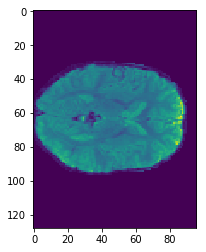

In [16]:
plt.imshow(img[:, :, 10, 0])

The complete information embedded in **an image header** is available via **a format-specific header object**.

In [17]:
hdr = img_obj.header

In [18]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4 128  96  24   2   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.000000e+00  2.000000e+00  2.000000e+00  2.199999e+00  2.000000e+03
  1.000000e+00  1.000000e+00  1.000000e+00]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 23
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1162.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3\x00 v2.25 NIfTI-1 Single file format'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -1.9451068e-26
quatern_c       :

Corresponding `setter` methods allow **modifying a header**, while ensuring its compliance with the file format specifications.


In some situations we need even more flexibility, and for with great courage, NiBabel also offers access to **the raw header information**.


**This lowest level of the API** comes **without any safety-net**.

In [19]:
raw = hdr.structarr
raw['xyzt_units']

array(10, dtype=uint8)

In [20]:
raw['xyzt_units'] = 100
raw['xyzt_units']

array(100, dtype=uint8)

To creat a new image in some file format, at a minimum it only needs some **image data** and **an image coordinate transformation (affine)**.

In [21]:
data = np.ones((16, 16, 8, 32), dtype=np.int16)
img_obj = nib.Nifti2Image(data, np.eye(4))

In [22]:
img_obj.get_data_dtype()

dtype('<i2')

In [23]:
img_obj.header.get_xyzt_units()

('unknown', 'unknown')

**The image header** is initialized from the provided data array (i.e. shape, dtype) and all other values are set to resonable defaults.


Save this new image to a file.

In [24]:
img_obj.to_filename('./results/nibabel_nifti_test_0001.nii')

or

In [25]:
nib.save(img_obj, './results/nibabel_nifti_test_0002.nii')